### Introductory


#### Basic Usage

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

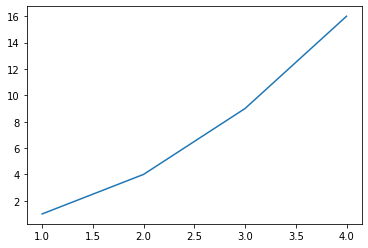

In [ ]:
# a simple example

# create a figure containing a sinlge axes
fig, ax = plt.subplots()
# plot some data on the axes
plt.plot([1,2,3,4], [1,4,9,16])

- anatomy of a figure
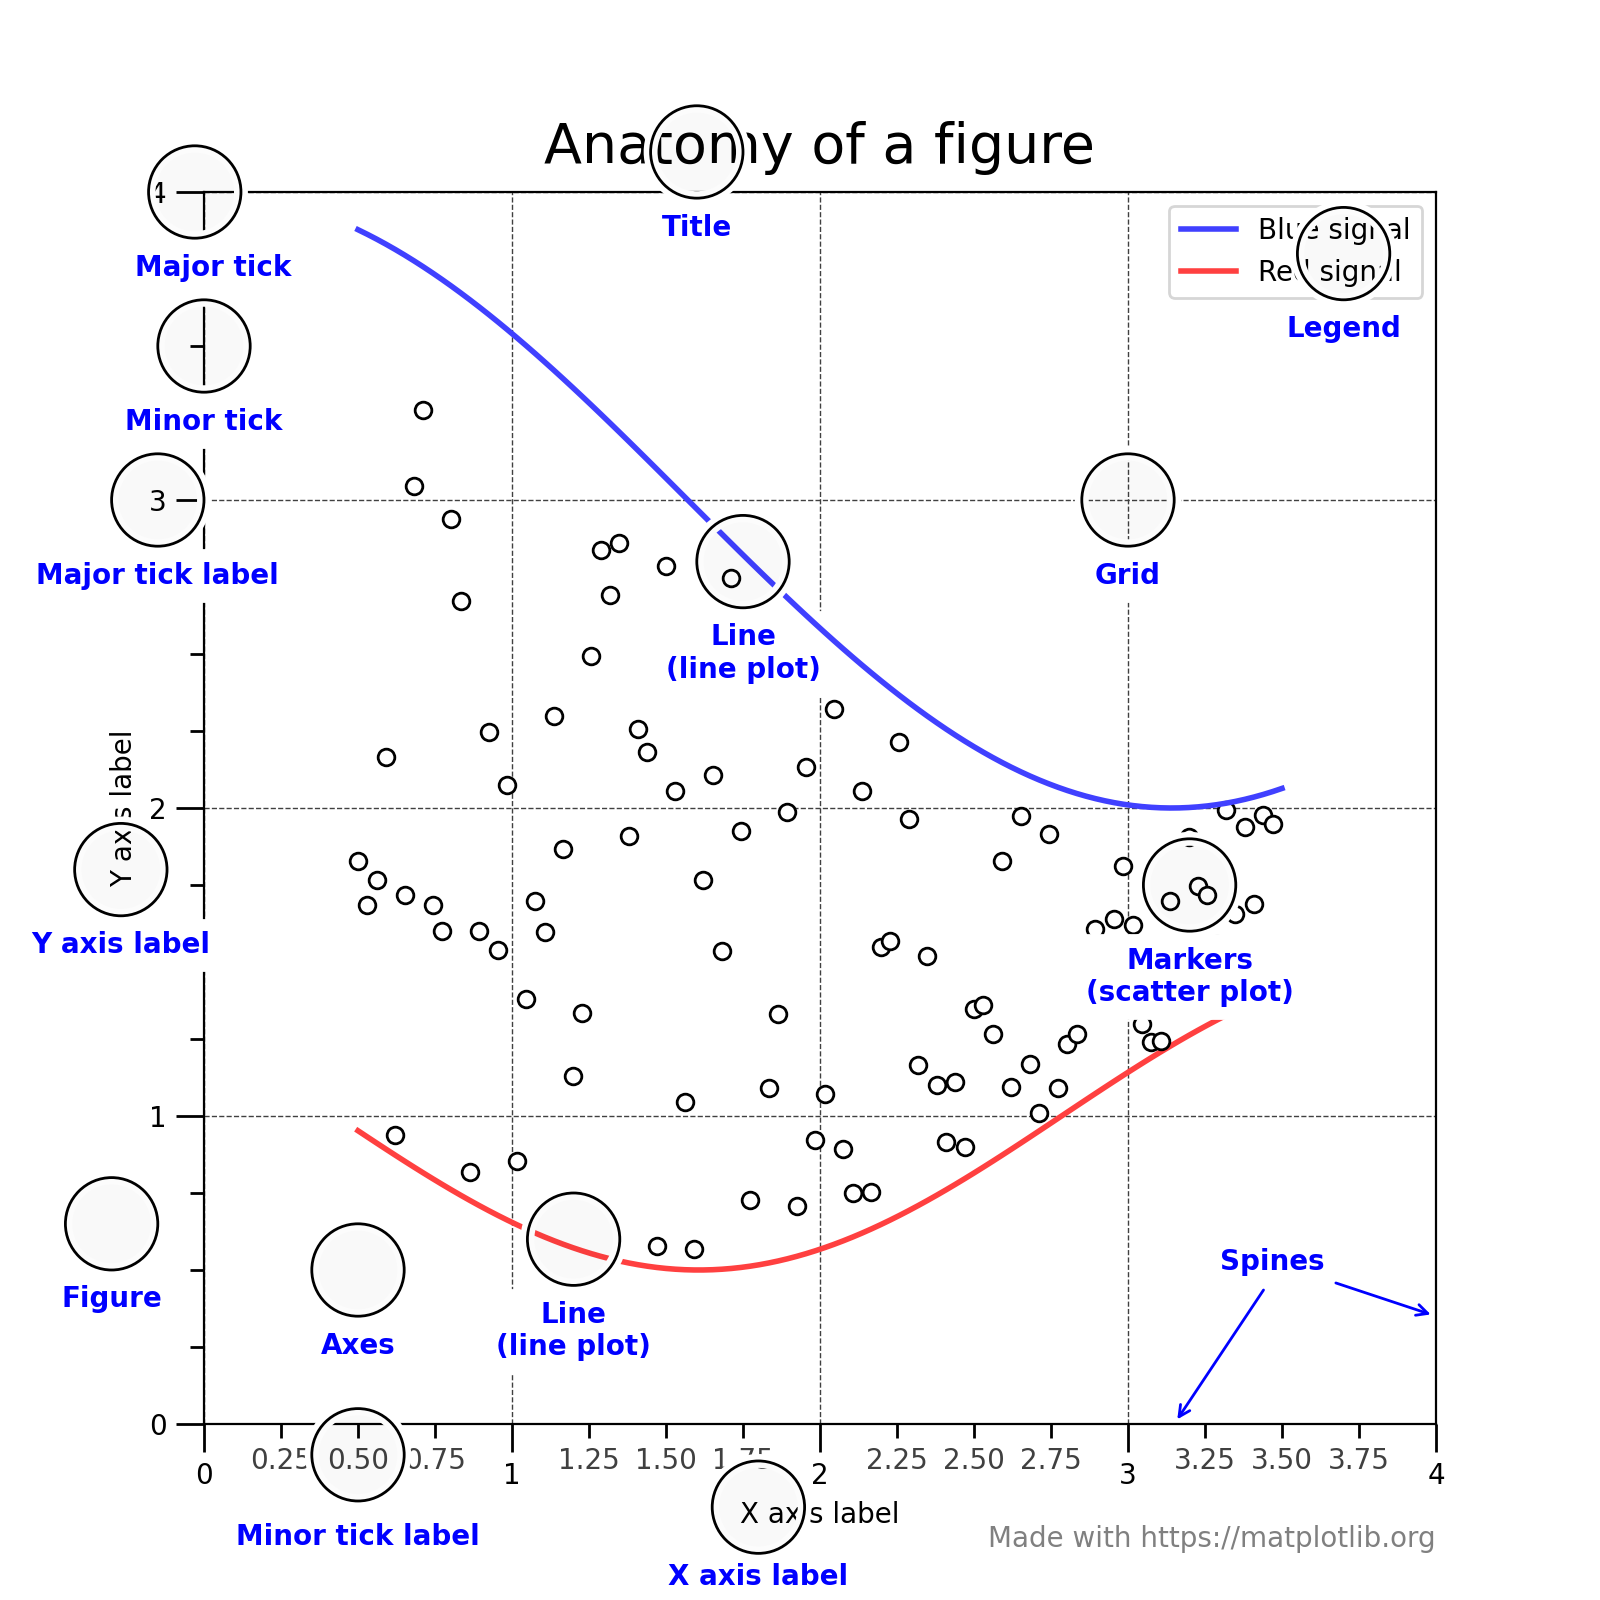





##### Figure
- The **whole** figure
- Keeps track of:
  - all child *Axes* 
  - a group of 'special' Artists (titles, figure legends, colorbars)
  - nested subfigures
- It is often convenient to create Axes together with the Figures
  - i.e. fig, ax = plt.subplots()
  - But, you can also manually add Axes later
- Many Matplotlib backends support:
  - zooming
  - panning 

##### Axes
- An Axes is an Artist attached to a Figure
- contains a region for plotting data
- usually contains 2 (3 in case of 3d) Axis objects
  - Axis objects provide ticks and tick labels
  - also provide a title, labels

##### Artist
- Basically everything visible on the Figure is an Artist (even Figure, Axes, Axis objects)
- includes Text, Line2D, collections, Patch objects etc.
- When Figure is rendered, Artists are drawn on the canvas
- Most Artists are tied to an Axes
  - such Artists cannot be shared by multiple Axes or moved from one to another

##### Input Types & Plotting Functions
- Plotting functions expect a np.array or np.ma.masked_array as input
- Also accepts objects that can be passed to np.asarray
- Pandas data objects and np.matrix may not work as intended
  - common convention is to convert these to np.array()

##### Coding Styles
1. Explicitly create Figures and Axes and call methods on them (the **OOP style**)
  - e.g. fig, ax = plt.subplots()
  - ax.plot(..), ax.set_xlabel(), ax.set_title(), ax.legend()
2. Rely on pyplot to automatically create and manage the Figures and Axes
  - and use pyplot functions for plotting
  - e.g. plt.figure(...)
  - plt.plot(...), plt.legend(), plt.title()

##### Making helper functions
If you need to make the same plots over and over again with different data sets:
- or want to easily wrap Matplotlib methds
- use the recommended signature function below

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
  '''
  A helper function to make a graph.
  '''
  out = ax.plot(data1, data2, **param_dict)
  return out

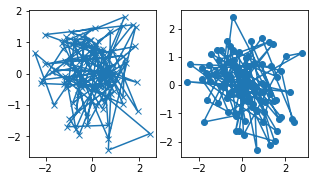

In [ ]:
# We can then use the helper function as many times as we need
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

##### Styling Artists
Most plotting methods have options to style the Artists.
- styling is accessible: 
  - either when a plotting method is called
  - or from a 'setter' on the Artist

['set', 'set_aa', 'set_agg_filter', 'set_alpha', 'set_animated', 'set_antialiased', 'set_c', 'set_clip_box', 'set_clip_on', 'set_clip_path', 'set_color', 'set_contains', 'set_dash_capstyle', 'set_dash_joinstyle', 'set_dashes', 'set_data', 'set_drawstyle', 'set_ds', 'set_figure', 'set_fillstyle', 'set_gid', 'set_in_layout', 'set_label', 'set_linestyle', 'set_linewidth', 'set_ls', 'set_lw', 'set_marker', 'set_markeredgecolor', 'set_markeredgewidth', 'set_markerfacecolor', 'set_markerfacecoloralt', 'set_markersize', 'set_markevery', 'set_mec', 'set_mew', 'set_mfc', 'set_mfcalt', 'set_ms', 'set_path_effects', 'set_picker', 'set_pickradius', 'set_rasterized', 'set_sketch_params', 'set_snap', 'set_solid_capstyle', 'set_solid_joinstyle', 'set_transform', 'set_url', 'set_visible', 'set_xdata', 'set_ydata', 'set_zorder']


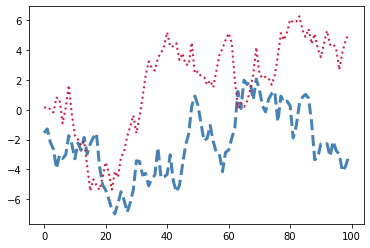

In [ ]:
# manually setting the style e.g. color, linewidth etc.
fig, ax = plt.subplots()
x = np.arange(len(data1))
# styling directly on the plot method as arguments
ax.plot(x, np.cumsum(data1), color='steelblue', linewidth=3, linestyle='--')
# indirectly after calling the plot method
l, = ax.plot(x, np.cumsum(data2), color='crimson')
l.set_linewidth(2)
l.set_linestyle(':')

# other methods to set and style
print([x for x in dir(l) if x[0:3] == 'set'])


###### Colors
Matplotlib has a very flexible array of colors. 
- the colors are accepted for most Artists
- some Artists will take multiple colrs
  - e.g. scatterplot edge and markers can be of different color (shown below)

**Specifying Colors**  
Matplotlib recognizes following formats
- RGB / RGBA e.g. (0.1, 0.2, 0.5)  or (0.1, 0.2, 0.5, 0.7)
- hex (case insensitive) e.g. '#aabbc0' or '#aabbc080' (with alpha)
- hex shorthand e.g. '#fba' for '#ffbbaa'
- grayscale value in interval [0, 1] e.g. '0' for black, '0.5' for grey,  '1' for white etc.
- string character shorthands: 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
- case insensitive full names: e.g. 'blue', 'green', 'aquamarine', 'tomato' etc.
- case insensitive tableau colors: e.g. 'tab:blue', 'tab:olive' etc.
- 'CN' where 'N' is the index of the color. e.g. 'C0' for '#1f77b4' etc.

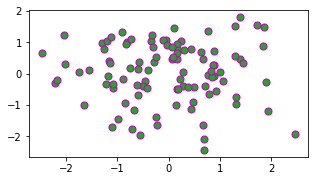

In [ ]:
fix, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='tab:green', edgecolor='m')

###### Linewidth, linestyle and markersize
- default linewidth 1pt = 1/72 inch
  - linewidth is available for Artists that have stroked lines
- linestyle is also available for Artists that have stroked lines
- see different markers in the image below:
  - 'o' for circle, 'd' for diamond, 'v' for triangle, 's' for square

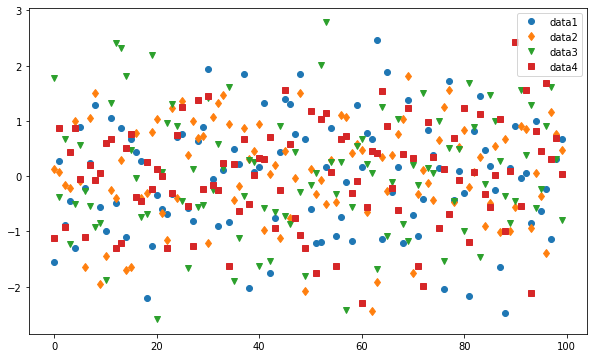

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

##### Labelling Plots

##### Axes labels and text
- set_xlabel
- set_ylabel
- set_title
are used to add text in indicated locations. 

Text can also be added directly to plots using **text**

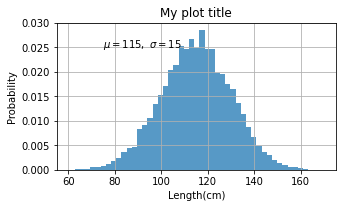

In [ ]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7))
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length(cm)')
ax.set_ylabel('Probability')
ax.set_title('My plot title')
# set text
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')

# set axis limits [xmin, xmax, ymin, ymax]
ax.axis([55, 175, 0, 0.03])

ax.grid(True)

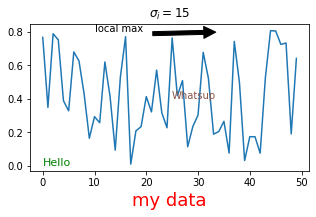

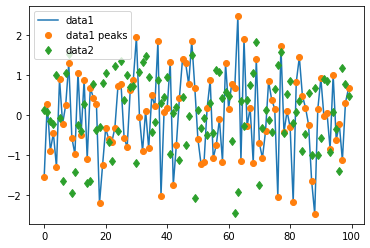

In [ ]:
# all text functions return a matplotlib.text.Text instance
# we can use that instance to make further text customisations
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.sin(np.random.uniform(0,1,50)))

t1 = ax.set_xlabel('my data')
t1.set_fontsize(18)
t1.set_color('red')

t2 = ax.text(0, 0, 'Hello', fontsize='11')
t2.set_color('g')

t3 = ax.text(25, 0.4,'Whatsup', color='tab:brown')

# using Mathematical Expressions in text
# matplotlib accepts TeX expressions
ax.set_title(r'$\sigma_i=15$')

# Annotations
ax.annotate('local max', xy=(35, 0.8), xytext=(10, 0.8),
            arrowprops=dict(facecolor='k', shrink=0.1))

# Legends
# we often want to indentify lines and markers with legends
fig, ax = plt.subplots()
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data1)), data1, 'o', label='data1 peaks')
ax.plot(np.arange(len(data2)), data2, 'd', label='data2')
plt.legend()

##### Axis scales and ticks
Each Axes object has 2 (or 3) Axis objects representing the x and y axis.
- these Axis objects control the:
  - scale
  - tick locators
  - tick formatters
- also, additional Axes can be attached to display further Axis objects

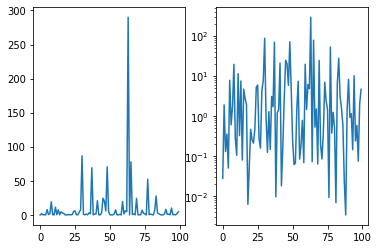

In [ ]:
# Scales
# linear, non-linear(e.g. log)
fig, axs = plt.subplots(1,2)
xdata = np.arange(len(data1))
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

<ipython-input-13-0fdfbca86189>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90']) # doesn't work for some reason


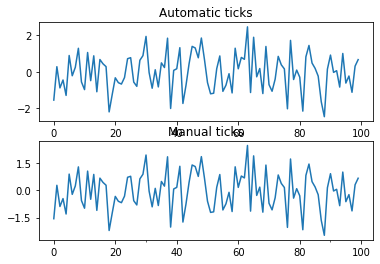

In [ ]:
# Tick locators and formatters
fig, axs = plt.subplots(2, 1)
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90']) # doesn't work for some reason
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

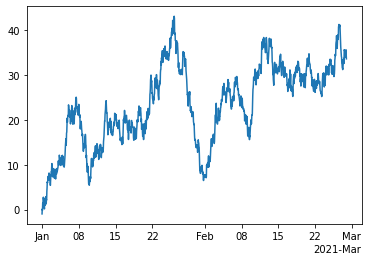

In [ ]:
# Plotting dates
fig, ax = plt.subplots()
dates = np.arange(np.datetime64('2021-01-01'), np.datetime64('2021-02-28'), np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

[0.06110202 0.91194446 0.93502302 0.18330509 0.08129144 0.49633566]


<BarContainer object of 6 artists>

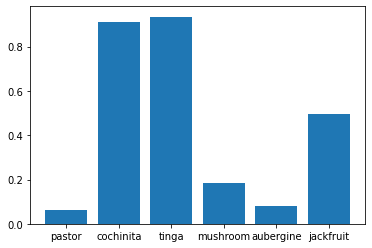

In [ ]:
# Plotting strings
fig, ax = plt.subplots()
categories = ['pastor', 'cochinita', 'tinga', 'mushroom', 'aubergine', 'jackfruit']
values = np.random.rand(len(categories))

print(values)

ax.bar(categories, values)

#### Pyplot tutorial

#### Image tutorial

#### Lifecycle of a plot

#### Customizing with stylesheets and rcParams

### Intermediate

#### Artist tutorial

#### Legend guide

#### Styling with cycler

#### Custimizing figure layouts with GridSpec etc.

#### Constrained layour guide

#### Tight layout guide

#### Autoscaling

#### Origin and extent in imshow

### Advanced

#### Faster rendering by using blitting

#### Path tutorial

#### Path effects guide

#### Transformations tutorial

### Colors

#### Specifying colors

#### Customising colorbars

#### Creating colormaps

#### Colormap normalization

#### Choosing colormaps

### Provisional

#### Complex and semantic figure composition

### Text


#### Text in plots

#### Text properties and layout

#### Annotations

#### Writing mathematical expressions

#### Typesetting with XeLaTex/LuaLaTex

#### Text rendering with laTeX

### Toolkits

#### Overview of mpl_toolkits.axes_grid1

#### Overview of axisartist toolkit

#### The mplot3d Toolkit